
# Project: Investigate a Dataset - [Patients no show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contain data for about 100k patients in Brazil, it shows some features for those patients like their age, gender, their neighbourhood and whether they are diabetic, hypertensive, handicapped, alcholic, enrolled in welfare program, received sms before the appointment or not.
we are going to study these features to know what are the characteristics of patients who showed up in the appointment and the characteristics of those who were absent.


### Question(s) for Analysis
>
1- does age, gender, neighbourhood, diabetes, hypertension, handicapping, alcholism, enrolling in welfare program and receiving sms before the appointment affect the attendance ?
2- does these features vary from a neighbourhood to another?
3- what are the characteristics of absent patients?

In [154]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [155]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


### General Properties

In [156]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(df.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [157]:
print(df.shape)

(110527, 14)


In [158]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [159]:
print(df.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

the mean age is 37
the max age is 115
the min age is -1 (which is a mistake and we are going to drop this row in the cleaning process)


### Data Cleaning

In [160]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

### changing columns names to avoid confusion and make the pandas functions more easy to call ###
df.rename(columns={'Hipertension':'hypertension','PatientId':'patient id','AppointmentID':'appointment id','ScheduledDay':'scheduled day','AppointmentDay':'appointment day'}, inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace(" ","_").replace("-","_"), inplace=True)


In [161]:
### removing the row which contain age value of -1 ### 
mask = df.query('age == -1')
print(mask)
df.drop(index=99832, inplace=True)

         patient_id  appointment_id gender         scheduled_day  \
99832  4.659432e+14         5775010      F  2016-06-06T08:58:13Z   

            appointment_day  age neighbourhood  scholarship  hypertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       diabetes  alcoholism  handcap  sms_received no_show  
99832         0           0        0             0      No  


In [162]:
### check for duplicates
print(df.duplicated().sum())

0


In [163]:
### check for unique value in patient_id column
print(df['patient_id'].nunique())


62298


In [164]:
### check for duplicates in patient_id column
print(df['patient_id'].duplicated().sum())

48228


In [165]:
### check for duplication in patients which have the same patient_id and have the same status of showing or no showing
print(df.duplicated(['patient_id','no_show']).sum())

38710


although the data set shows no duplication but there is a duplication for some patients which have the same values in each column of the data set except for the scheduled_day column and appointment_day column set so they do not appear in duplicates and it seems they repeated the appointment reservation process many times and do not attend any of them, so we are going to remove them 

In [166]:
### removing duplication in patients which have the same patient_id and have the same status of showing or no showing
df.drop_duplicates(['patient_id','no_show'], inplace=True)
print(df.shape)


(71816, 14)


In [167]:
### drop the column which have no use
df.drop(['patient_id','appointment_id','scheduled_day','appointment_day'], axis=1, inplace=True)
print(df.head())


  gender  age      neighbourhood  scholarship  hypertension  diabetes  \
0      F   62    JARDIM DA PENHA            0             1         0   
1      M   56    JARDIM DA PENHA            0             0         0   
2      F   62      MATA DA PRAIA            0             0         0   
3      F    8  PONTAL DE CAMBURI            0             0         0   
4      F   56    JARDIM DA PENHA            0             1         1   

   alcoholism  handcap  sms_received no_show  
0           0        0             0      No  
1           0        0             0      No  
2           0        0             0      No  
3           0        0             0      No  
4           0        0             0      No  


<a id='eda'></a>
## Exploratory Data Analysis



### A - columns overview

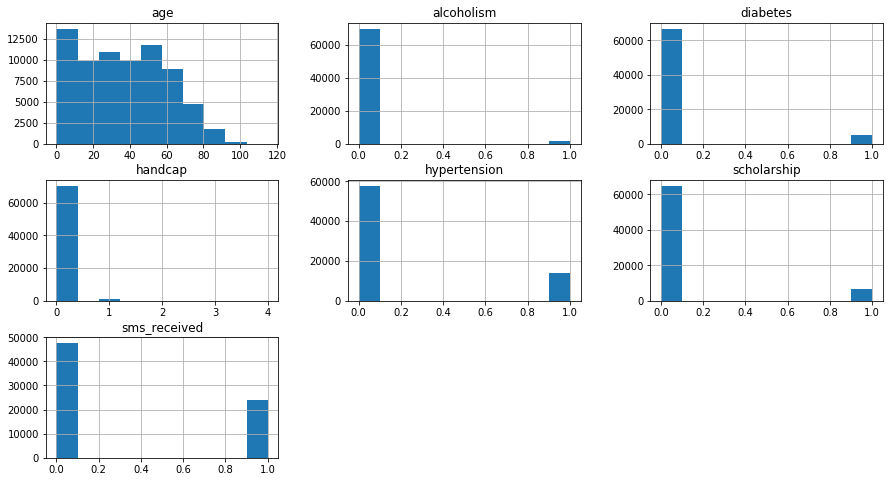

In [168]:
# what are general features of the data set?
df.hist(figsize=(15,8));


most patients age is  from  0 to 10 (about 13k patients) and then from 50 to 60 (about 12 k patients).
most patient are not alcoholic, diabetic, hypertensive or handicapped.
most patients are non sunbscribers in the brazilian welfare program.
about 1/3 of patients did not receive sms before the  appointment.

In [169]:
### replace values to be able to calculate attendance mean
df.no_show.replace(('Yes', 'No'), (0, 1), inplace=True)

In [170]:
###  create two data frames one contain show and other contain no show to facilitate
show = df.no_show== 1
noshow = df.no_show== 0
print(df[show].count(),df[noshow].count())
print(df[show].mean())
print(df[noshow].mean())

gender           54153
age              54153
neighbourhood    54153
scholarship      54153
hypertension     54153
diabetes         54153
alcoholism       54153
handcap          54153
sms_received     54153
no_show          54153
dtype: int64 gender           17663
age              17663
neighbourhood    17663
scholarship      17663
hypertension     17663
diabetes         17663
alcoholism       17663
handcap          17663
sms_received     17663
no_show          17663
dtype: int64
age             37.229166
scholarship      0.091334
hypertension     0.202944
diabetes         0.072868
alcoholism       0.023600
handcap          0.020904
sms_received     0.297232
no_show          1.000000
dtype: float64
age             34.376267
scholarship      0.108419
hypertension     0.170922
diabetes         0.065108
alcoholism       0.029440
handcap          0.017777
sms_received     0.453094
no_show          0.000000
dtype: float64


patients who attended their appointment 3 times those who did not attend.
age mean of patients who attended and who did not attend is almost the same.

### B - Investigating factors affecting attendancy

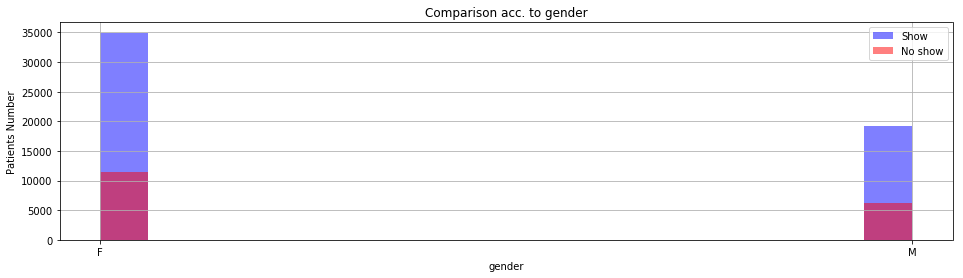

In [171]:
### compare show and no show acc. to gender

def attendance (df,colname,attended,absent):
    plt.figure(figsize=[16,4])
    df[colname][attended].hist(alpha=0.5,bins=17,color='blue',label='Show')
    df[colname][absent].hist(alpha=0.5,bins=17,color='red',label='No show')
    plt.legend()
    plt.title(f'Comparison acc. to {colname}')
    plt.xlabel(f'{colname}')
    plt.ylabel('Patients Number')
    plt.xticks(range(0,2,1))       
attendance(df,'gender',show,noshow)      


In [172]:
def attendance2 (df,colname,attended,absent):
    print('show')
    print(df[colname][attended].value_counts())
    print('No-show')
    print(df[colname][absent].value_counts())
          
attendance2(df,'gender',show,noshow)      


show
F    34960
M    19193
Name: gender, dtype: int64
No-show
F    11506
M     6157
Name: gender, dtype: int64


the proportion of absent people in male and females is almost the same

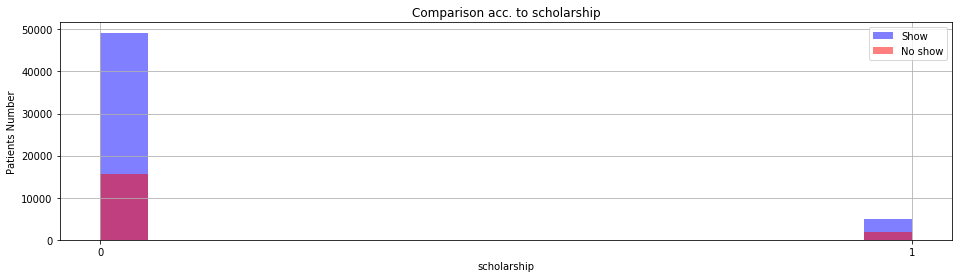

In [173]:
### compare show and no show acc to scholarship
attendance(df,'scholarship',show,noshow)

In [174]:
attendance2(df,'scholarship',show,noshow)      

show
0    49207
1     4946
Name: scholarship, dtype: int64
No-show
0    15748
1     1915
Name: scholarship, dtype: int64


the proportion of absent people in subscribers and non-subscribers is almost the same

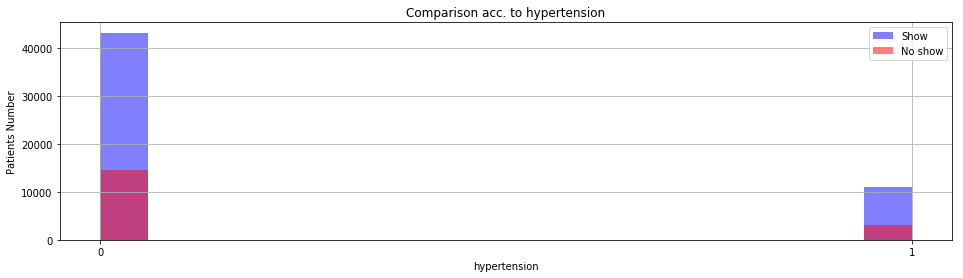

In [175]:
### compare show and no show acc to gender
attendance(df,'hypertension',show,noshow)

In [176]:
attendance2(df,'hypertension',show,noshow)      

show
0    43163
1    10990
Name: hypertension, dtype: int64
No-show
0    14644
1     3019
Name: hypertension, dtype: int64


the proportion of absent people in hypertensive and non-hypertensive is almost the same

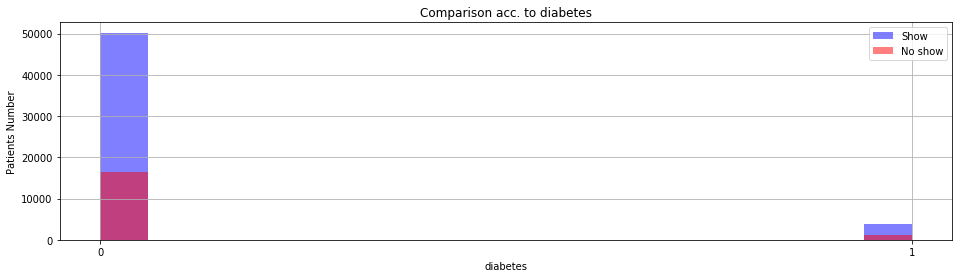

In [177]:
### compare show and no show acc to gender
attendance(df,'diabetes',show,noshow)

In [178]:
attendance2(df,'diabetes',show,noshow)      

show
0    50207
1     3946
Name: diabetes, dtype: int64
No-show
0    16513
1     1150
Name: diabetes, dtype: int64


the proportion of absent people in diabetic and non-diabetic is almost the same

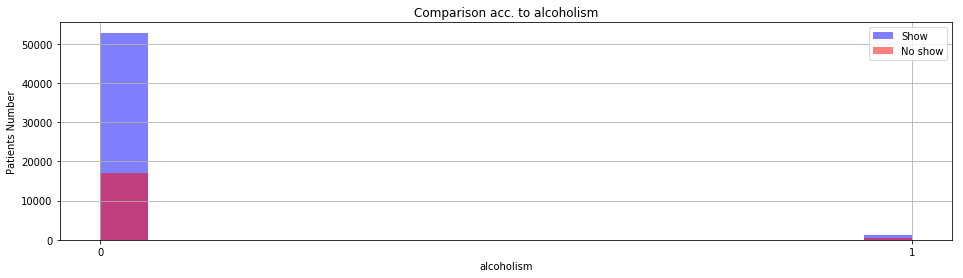

In [179]:
### compare show and no show acc to alcoholism
attendance(df,'alcoholism',show,noshow)

In [180]:
attendance2(df,'alcoholism',show,noshow)      

show
0    52875
1     1278
Name: alcoholism, dtype: int64
No-show
0    17143
1      520
Name: alcoholism, dtype: int64


the proportion of absent people in alcoholic and non-alcoholic is almost the same

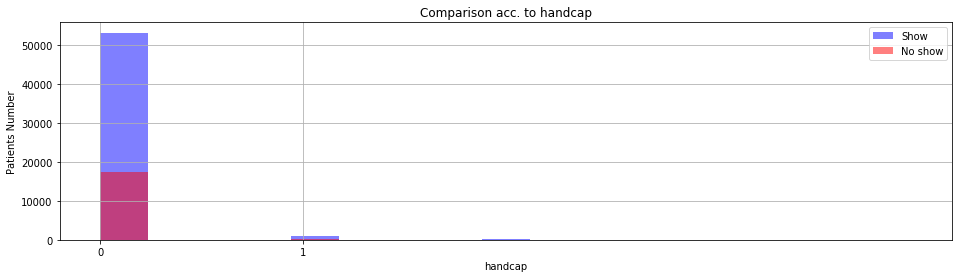

In [138]:
### compare show and no show acc to gender
attendance(df,'handcap',show,noshow)

In [139]:
attendance2(df,'handcap',show,noshow)      

show
0    53126
1      931
2       89
3        5
4        2
Name: handcap, dtype: int64
No-show
0    17385
1      247
2       27
3        3
4        1
Name: handcap, dtype: int64


the proportion of absent people in handicapped and non-handicapped is almost the same

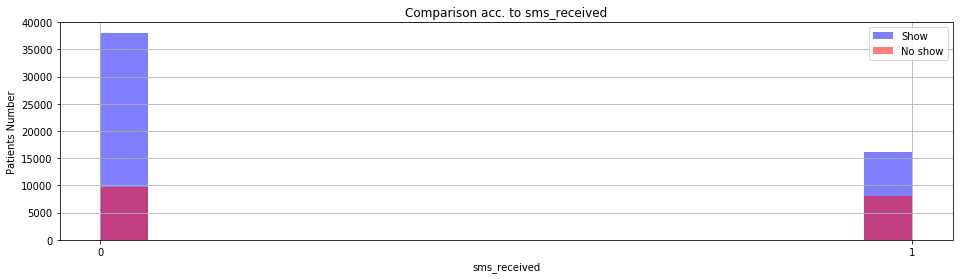

In [140]:
### compare show and no show acc to gender
attendance(df,'sms_received',show,noshow)

In [141]:
attendance2(df,'sms_received',show,noshow)      

show
0    38057
1    16096
Name: sms_received, dtype: int64
No-show
0    9660
1    8003
Name: sms_received, dtype: int64


surprisingly patients who did not receive sms and attend was much greater than those who recieve sms and attend.

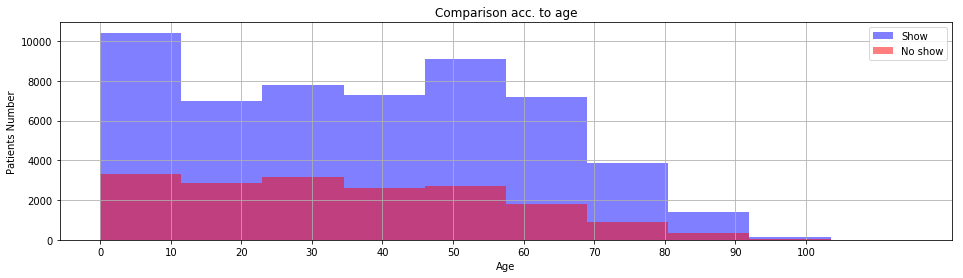

In [144]:
### compare show and no show acc to age
def attendance2 (df,colname,attended,absent):
    plt.figure(figsize=[16,4])
    df[colname][attended].hist(alpha=0.5,bins=10,width=11.5,color='blue',label='Show')
    df[colname][absent].hist(alpha=0.5,bins=10,width=11.5,color='red',label='No show')
    plt.legend()
    plt.title(f'Comparison acc. to {colname}')
    plt.xlabel('Age')
    plt.ylabel('Patients Number')
    plt.xticks(range(0,110,10))  
attendance2(df,'age',show,noshow)  



most patients age is  from  0 to 10 (about 11k patients) and then from 45 to 55 (about 9 k patients).

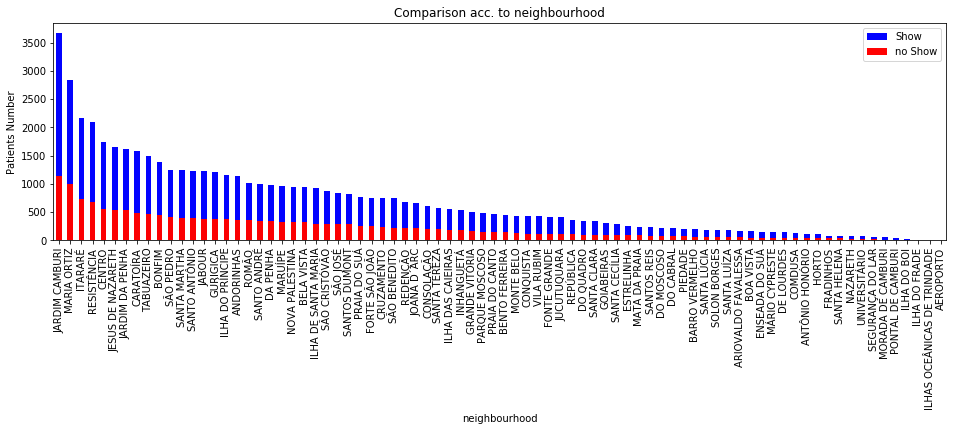

In [145]:
#### comparing attendance among the neighbourhoods ####
plt.figure(figsize=[16,4])
df[show].neighbourhood.value_counts().plot(kind='bar',alpha=0.99,color='blue',label='Show')
df[noshow].neighbourhood.value_counts().plot(kind='bar',alpha=0.99,color='red',label='no Show')
plt.legend()
plt.title('Comparison acc. to neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('Patients Number')
plt.show()


In [ ]:
the number of patients who attended varies from nighbourhood to another so we are going to do some neighbourhood studies.

### C - Neighbourhood studies


Text(0,0.5,'Attendance mean ')

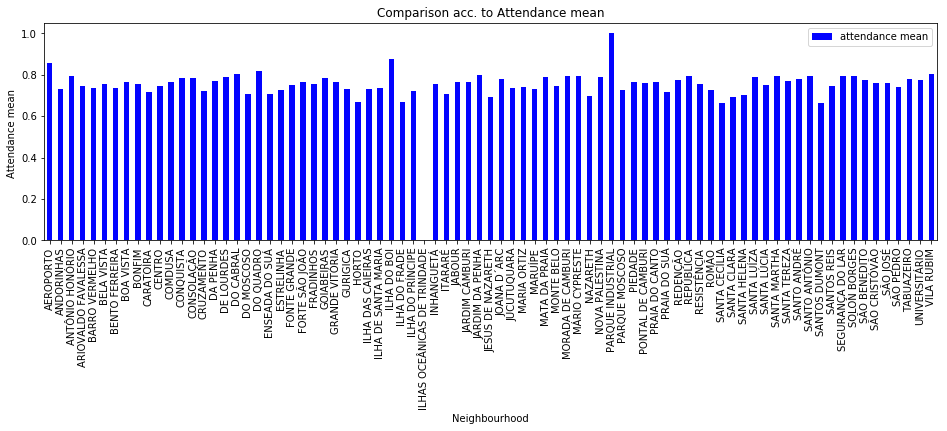

In [146]:
#### comparison acc. to attendance mean for each neighbourhood ####
plt.figure(figsize=[16,4])
df.groupby(['neighbourhood'])['no_show'].mean().plot(kind='bar',alpha=0.99,color='blue',label='attendance mean')
plt.legend()
plt.title('Comparison acc. to Attendance mean')
plt.xlabel('Neighbourhood')
plt.ylabel('Attendance mean ')


attendance mean is almost the same except for Parque industerial which showed almost 100 % attendance and Ilhas Oceania de trindade which showed 0% attendance

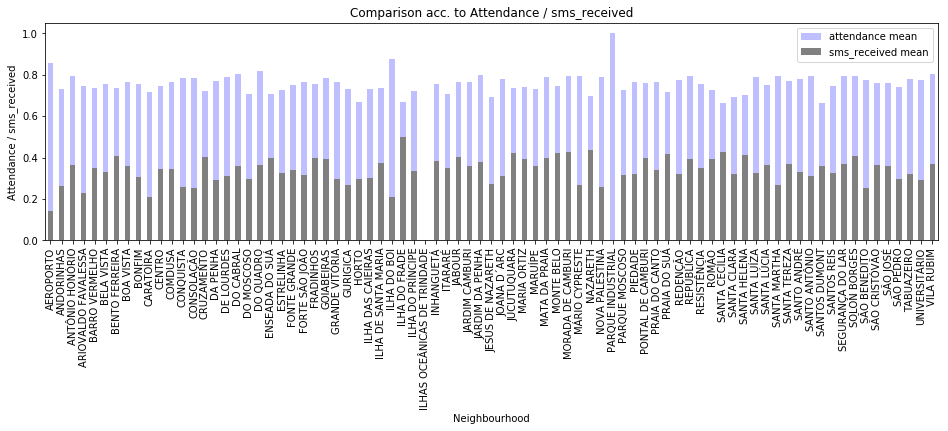

In [181]:
#### comparison acc. to attendance mean and SMS mean for each neighbourhood ####
def neighbourhood (df,colname1,colname2,colname3):
    plt.figure(figsize=[16,4])
    df.groupby([colname1])[colname2].mean().plot(kind='bar',alpha=0.25,color='blue',label='attendance mean')
    df.groupby([colname1])[colname3].mean().plot(kind='bar',alpha=1,color='grey',label=f'{colname3} mean')
    plt.legend()
    plt.title(f'Comparison acc. to Attendance / {colname3}')
    plt.xlabel('Neighbourhood')
    plt.ylabel(f'Attendance / {colname3}')
    
neighbourhood(df,'neighbourhood','no_show','sms_received')      



there is no co-relation between attendance and sms received in each neighbourhood

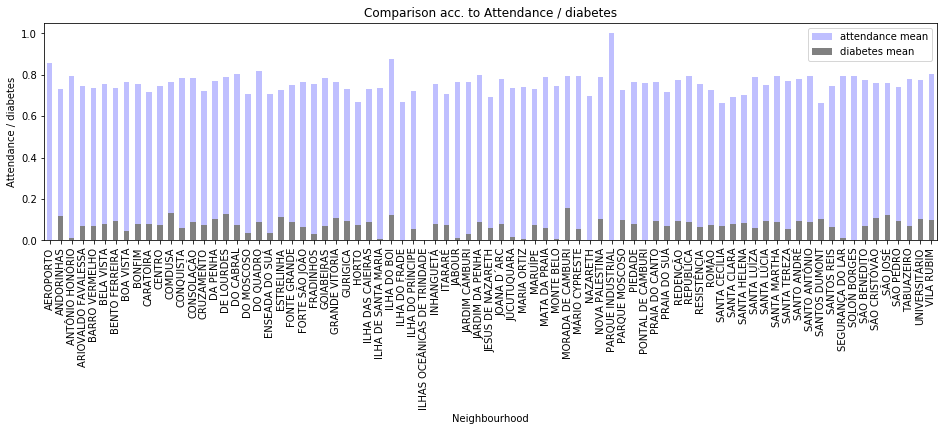

In [148]:
#### comparison acc. to attendance mean and diabetes for each neighbourhood ####
neighbourhood(df,'neighbourhood','no_show','diabetes')  

there is no co-relation between attendance and diabetes in each neighbourhood

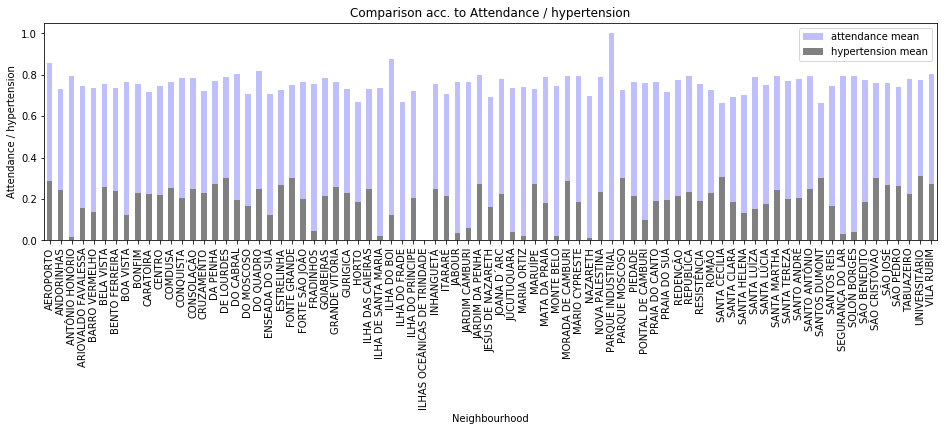

In [149]:
#### comparison acc. to attendance mean and hypertension for each neighbourhood ####
neighbourhood(df,'neighbourhood','no_show','hypertension')  

there is no co-relation between attendance and hypertension in each neighbourhood

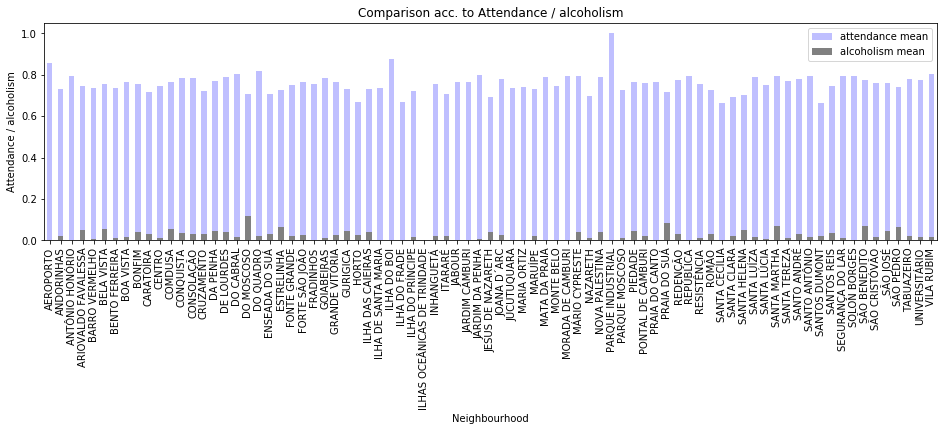

In [150]:
#### comparison acc. to attendance mean and alcoholism for each neighbourhood ####
neighbourhood(df,'neighbourhood','no_show','alcoholism')  

there is no co-relation between attendance and alcoholism in each neighbourhood

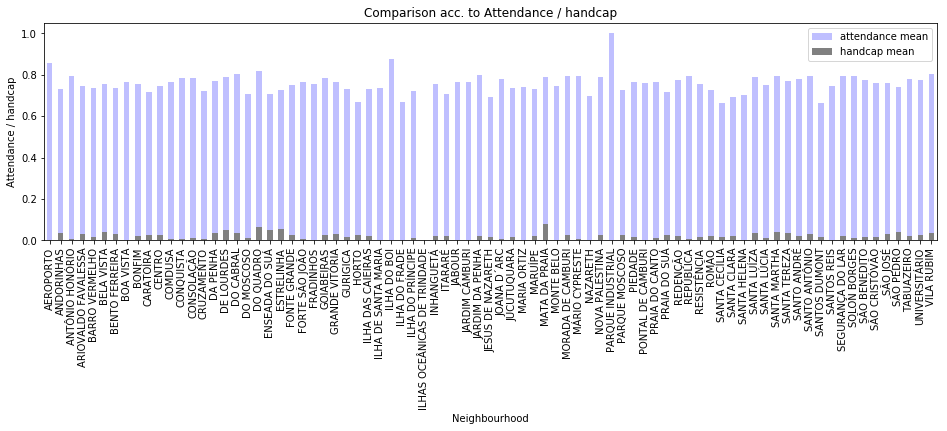

In [151]:
#### comparison acc. to attendance mean and handicapping for each neighbourhood ####
neighbourhood(df,'neighbourhood','no_show','handcap')  

there is no co-relation between attendance and handicapping in each neighbourhood

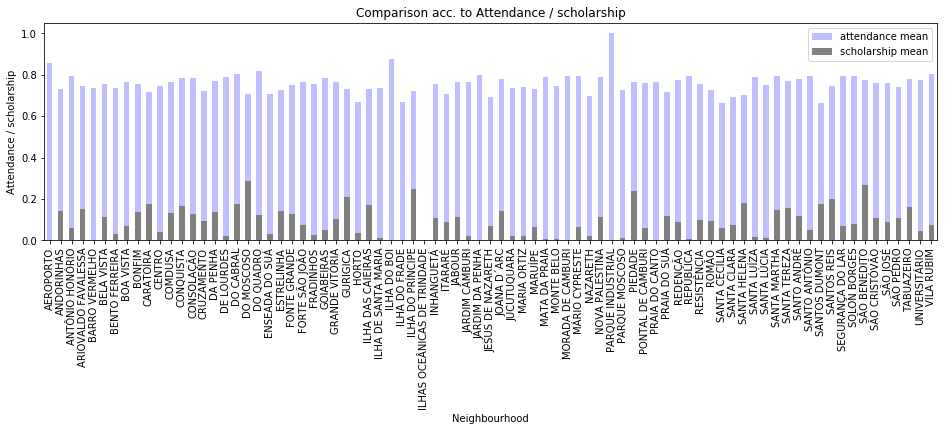

In [152]:
#### comparison acc. to attendance mean and scholarship for each neighbourhood ####
neighbourhood(df,'neighbourhood','no_show','scholarship')  

There is no co-relation between attendance and subscription in the brazilian welfare program in each neighbourhood.

### D - Characteristics of absent patients
 

Text(0,0.5,'number of patients')

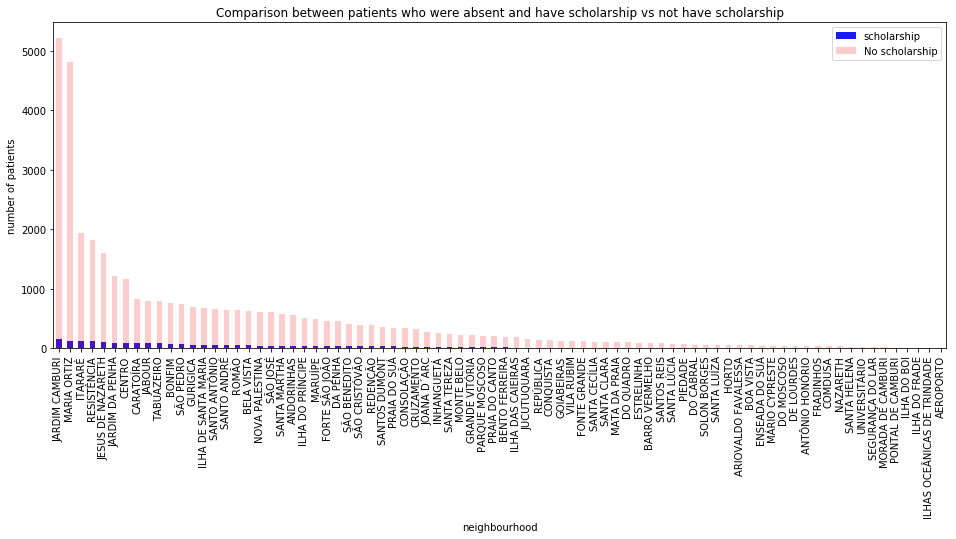

In [182]:
### Comparison between patients who were absent and have scholarship vs not have scholarship

scholar_1 = df.query('scholarship > 0.5')
scholar_0 = df.query('scholarship < 0.5')
noshoo = df.query("no_show == 0")
noshoo_scholar_1 = noshoo.merge(scholar_1, how='inner')
noshoo_scholar_0 = noshoo.merge(scholar_0, how='inner')

plt.figure(figsize=[16,6])
noshoo_scholar_1.neighbourhood.value_counts().plot(kind='bar',alpha=0.9,color='blue',label='scholarship')
noshoo_scholar_0.neighbourhood.value_counts().plot(kind='bar',alpha=0.2,color='red',label='No scholarship')
plt.legend()
plt.title('Comparison between patients who were absent and have scholarship vs not have scholarship')
plt.xlabel('neighbourhood')
plt.ylabel('number of patients')

Absent patients were almost non subscribers in the brazilian welfare program.

Text(0,0.5,'number of patients')

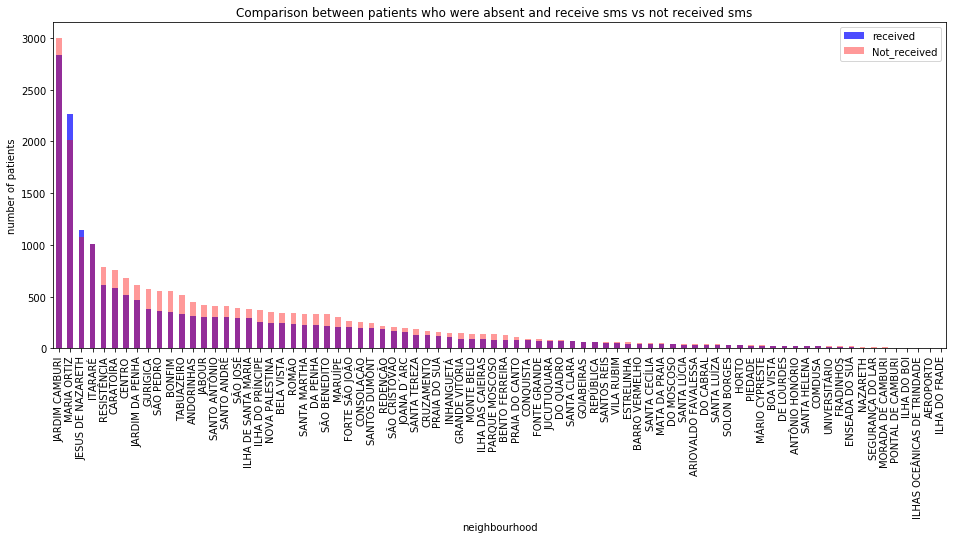

In [183]:
#### Comparison between patients who were absent and receive sms vs not received sms in each neighbourhood ####
sms_1 = df.query('sms_received > 0.5')
sms_0 = df.query('sms_received < 0.5')
noshoo = df.query("no_show == 0")
noshoo_sms_1 = noshoo.merge(sms_1, how='inner')
noshoo_sms_0 = noshoo.merge(sms_0, how='inner')

plt.figure(figsize=[16,6])
noshoo_sms_1.neighbourhood.value_counts().plot(kind='bar',alpha=0.7,color='blue',label='received')
noshoo_sms_0.neighbourhood.value_counts().plot(kind='bar',alpha=0.4,color='red',label='Not_received')
plt.legend()
plt.title('Comparison between patients who were absent and receive sms vs not received sms   ')
plt.xlabel('neighbourhood')
plt.ylabel('number of patients')

More than half of the absent patients did not receive sms before the appointment.

<a id='conclusions'></a>
## Conclusions

>
1- neighbourhood is strongly related to the patient attendance.
2- age play a role in attendancy as patients of age from 0 to 10and from 35 to 70 were the most attendant.
3- although it sounds strange but people who did not receive sms showed more attendance than those who received 
### Limitations
> 
1- patients features are almost the same as most of them are not alcoholic, diabetic, hypertensive or handicapped and non sunbscribers in the brazilian welfare program and this make some limitations in determining the effect of these feature on attendance.
2- having a big sector of patients who did not receive sms before their appointment does not allow us to make better analysis for the effect this feature on attendance? 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])